<a href="https://colab.research.google.com/github/delferns2001/FYP/blob/master/7Hour_Youtube_Tutorial_Neural_Networks_with_MNIST(numbers_dataset)_Number(image)_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's get started, import the TensorFlow library into your program, along with the library to plot graphs (matplotlib)

In [ ]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

import numpy as np

Load and prepare the MNIST dataset. Convert the samples from integers to floating-point numbers:

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

Visualize some of the dataset images

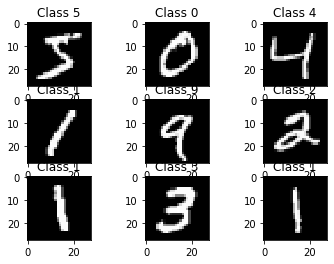

In [ ]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

What is the size of the data?

In [ ]:
print("x_train original shape", x_train.shape)
print("y_train original shape", y_train.shape)

x_train original shape (60000, 28, 28)
y_train original shape (60000,)


Build the tf.keras model by stacking layers. Select an optimizer and loss function used for training:

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(12, activation=tf.nn.sigmoid),
  tf.keras.layers.Dense(12, activation=tf.nn.sigmoid),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) 

Train and evaluate model:

In [ ]:
model.fit(x_train, y_train, epochs=20)

print("Model accuracy on the test set is:", model.evaluate(x_test, y_test)[1])


Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4840 - accuracy: 0.5484
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7915 - accuracy: 0.7782
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6291 - accuracy: 0.8186
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5528 - accuracy: 0.8366
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5111 - accuracy: 0.8489
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4816 - accuracy: 0.8555
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4590 - accuracy: 0.8591
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4427 - accuracy: 0.8644
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4273 - accuracy: 0.8681
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.413

See what you have got wrong!

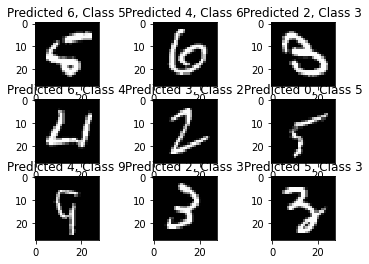

In [ ]:
# Predict function outputs an array with the probability for each class
# according to the trained classifier for each input example.
# The np.argmax will return the index of the maximum class probability
predicted_classes = np.argmax(model.predict(x_test), axis=-1)

# Check which items we got wrong
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))